In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Abdelrahman_work/prj_#1_classification/Modifizierte-Daten-Zusammengefasst.txt', sep = '\t')
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
df.replace('n', 0, inplace = True)
df.replace('y', 1, inplace = True)
df.replace('e', 1, inplace = True)
df.replace('u', 2, inplace = True)
df.replace('mod', df['pah'].mode()[0], inplace = True)
df.replace('s', df['surgery_urgency'].mode()[0], inplace = True)
df.replace('0-3L', 0, inplace = True)
df.replace('3-5L', 1, inplace = True)
df.replace('5-10L', 2, inplace = True)
df.replace('>10L', 3, inplace = True)
print('The number of duplicated entries in the dataset is:\n', sum(df.duplicated()))
print('The number of missing values in the dataset is:\n', df.isna().sum())

The number of duplicated entries in the dataset is:
 0
The number of missing values in the dataset is:
 fallnr                                   0
verstorben_1                             0
creatinine_clearance                     0
ef_percent                               0
instable_angina                          0
nyha                                     0
dialysis                                 0
copd                                     0
copd_dauermedikation                     0
extrakard_arterienerkrankung             0
impairment_mobility                      0
acute_endocarditis                       0
iddm                                     0
pah                                      0
re_op                                    0
mi_in_last90_days                        0
preop_critical                           0
surgery_urgency                          0
comb_surgery                             0
thoracal_aortic_surgery                  0
log_euroscore_perc                  

In [ ]:
#Dropping columns exceeding +97 missing values, and dropping the missing values in the response variable column:
df.drop(columns = ['tropi_preop_ngperml','tropi_max_postop_ngperml','tropi_min_postop_ngperml','TropT_preOP_ngPERL','tropt_max_postop_ngperl','tropt_min_postop_ngperl','ck_preop_uperl'], inplace = True)
df.dropna(subset = ['therapie_relevantes_delir_ja1'], inplace = True)
y = df['therapie_relevantes_delir_ja1']
X = df.drop(columns = ['therapie_relevantes_delir_ja1'])
print(X.isna().sum())

fallnr                                  0
verstorben_1                            0
creatinine_clearance                    0
ef_percent                              0
instable_angina                         0
nyha                                    0
dialysis                                0
copd                                    0
copd_dauermedikation                    0
extrakard_arterienerkrankung            0
impairment_mobility                     0
acute_endocarditis                      0
iddm                                    0
pah                                     0
re_op                                   0
mi_in_last90_days                       0
preop_critical                          0
surgery_urgency                         0
comb_surgery                            0
thoracal_aortic_surgery                 0
log_euroscore_perc                      0
gender_m1                               0
KHK_1_2_3                               0
height_cm                         

In [ ]:
# Handling missing values in the rest of the columns:
missing_quantitative = ['hlm_bilanz_l', 'hlm_zeit_min', 'durchschnitts_bilanz_tag_l', 'hb_preop_gperdl', 'haematokrit_preop_percent', 'ckmb_preop_mcgperl', 'crp_preop_mgperl', 'crp_max_postop_mgperl', 'crp_min_postop_mgperl', 'kreatinin_preop_mgperdl', 'thrombos_preop', 'beatmungsdauer_icu_stunden']
missing_categorical = ['levosemendan_ja1', 'whs_ja1']
for missing_quantit in missing_quantitative:
    X[missing_quantit].fillna(X[missing_quantit].median(), inplace = True)
    
for missing_cat in missing_categorical:
    X[missing_cat].fillna(X[missing_cat].mode()[0], inplace = True)
    
print(X.info())
X.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 93 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fallnr                               258 non-null    int64  
 1   verstorben_1                         258 non-null    int64  
 2   creatinine_clearance                 258 non-null    float64
 3   ef_percent                           258 non-null    int64  
 4   instable_angina                      258 non-null    int64  
 5   nyha                                 258 non-null    int64  
 6   dialysis                             258 non-null    int64  
 7   copd                                 258 non-null    int64  
 8   copd_dauermedikation                 258 non-null    int64  
 9   extrakard_arterienerkrankung         258 non-null    int64  
 10  impairment_mobility                  258 non-null    int64  
 11  acute_endocarditis              

,fallnr,verstorben_1,creatinine_clearance,ef_percent,instable_angina,nyha,dialysis,copd,copd_dauermedikation,extrakard_arterienerkrankung,impairment_mobility,acute_endocarditis,iddm,pah,re_op,mi_in_last90_days,preop_critical,surgery_urgency,comb_surgery,thoracal_aortic_surgery,log_euroscore_perc,gender_m1,KHK_1_2_3,height_cm,gewicht_kg,bmi_kgperm2,a_ht,dm,nikotibusus,adipositas,hyperlipidemie,familiaere_disposition,male_1,gesamt_cvrf,anzahl_der_bypaesse,mamaria_ja1,doppelmamaria_ja1,opcab_ja1,komplikationen_ja1,eks,ffps,tks,nora_max_mcgperml,dobutamin_maxmcgpermin,adrelin_max_mcgpermin,milrinon_max_mcgperh,vasopressin_max_uperh,hlm_bilanz_l,hlm_zeit_min,icu_max_postop_plusbilanz_ml,icu_max_postop_plusbilanz_l,icu_tage,gesamtbilanz_l,group_gesamtbilanz,durchschnitts_bilanz_tag_l,bilanz_pro_kg_lkg,pm_dependency_ja1,mean_eigenfrequenz_bpm,avblock_aa_vhf_vhflattern_ja1,ves_vf_ja1,amiodaron_digitoxin_rhythmonorm_ja1,levosemendan_ja1,cam_ja1,delir_dauer_tage,attest_ja1,whs_ja1,hb_preop_gperdl,hb_max_postop_gperdl,hb_min_postop_gperdl,haematokrit_preop_percent,haematokrit_max_postop_percent,haematokrit_min_postop_percent,ckmb_preop_mcgperl,ckmb_max_postop_mcgperl,ckmb_min_postop_mcgperl,ck_max_postop_uperl,ck_min_postop_uperl,crp_preop_mgperl,crp_max_postop_mgperl,crp_min_postop_mgperl,kreatinin_preop_mgperdl,krea_max_postop_mgperdl,krea_min_postop_mgperdl,thrombos_preop,thrombos_max_postop,thrombos_min_postop,sonstige_neurol_krankheiten,apoplex_in_der_vorgeschichte,alzheimer_demenz_in_der_vorgesch,carotisstenose,cortison_oder_mtx,beatmungsdauer_icu_stunden,age_at_surg
count,2.580000e+02,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.0,258.000000,258.000000,258.000000,258.000000,258.0,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.000000,258.000000,258.000000
mean,8.149499e+06,0.031008,88.772562,51.693798,0.131783,2.817829,0.011628,0.135659,0.058140,0.418605,0.023256,0.0,0.127907,0.0,0.023256,0.286822,0.015504,0.670543,0.0,0.0,0.029888,0.833333,2.813953,173.961240,84.635659,27.909302,0.945736,0.317829,0.515504,0.298450,0.759690,0.162791,0.833333,3.833333,3.089147,0.953488,0.089147,0.038760,0.143411,3.003876,1.689922,0.488372,22.348062,251.782946,1.507752,324.031008,0.160853,1.020562,124.775194,4965.414729,4.965415,4.968992,5.964620,1.500000,2.906080,0.071806,0.019380,76.027132,0.368217,0.069767,0.263566,0.007752,0.290698,1.488372,0.275194,0.139535,13.802326,11.398062,8.481008,40.197674,33.604651,25.081395,6.174806,39.928295,1.110078,983.131783,229.957364,7.030504,133.260272,31.565775,1.030969,1.326473,0.758915,235.868217,429.062016,136.406977,0.007752,0.062016,0.0,0.124031,0.003876,14.104651,67.652326
std,7.624532e+04,0.173676,31.065427,10.885468,0.338912,0.673102,0.107412,0.343092,0.234462,0.494289,0.151008,0.0,0.334635,0.0,0.151008,0.453157,0.123786,0.879945,0.0,0.0,0.042557,0.373402,0.427961,8.678345,15.297536,4.177677,0.226977,0.466538,0.500731,0.458467,0.428102,0.369892,0.373402,1.234764,0.776477,0.211000,0.285510,0.193397,0.351173,5.044161,3.331955,1.306174,28.034767,125.595544,5.540963,798.030181,0.690611,1.063270,34.701897,3188.713865,3.188714,4.193636,3.404071,0.847289,1.490627,0.042198,0.138124,11.039866,0.483258,0.255250,0.441

In [ ]:
# Handling outliers:
for column in X.columns:
    if not(((X[column].min() == 0) and (X[column].max() == 1)) or ((X[column].min() == 1) and (X[column].max() == 3))):
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        X[column] = np.where((X[column] > Q3 + 1.5 * IQR) | (X[column] < Q1 - 1.5 * IQR), X[column].median(), X[column])
    
display(X.describe())

,fallnr,verstorben_1,creatinine_clearance,ef_percent,instable_angina,nyha,dialysis,copd,copd_dauermedikation,extrakard_arterienerkrankung,impairment_mobility,acute_endocarditis,iddm,pah,re_op,mi_in_last90_days,preop_critical,surgery_urgency,comb_surgery,thoracal_aortic_surgery,log_euroscore_perc,gender_m1,KHK_1_2_3,height_cm,gewicht_kg,bmi_kgperm2,a_ht,dm,nikotibusus,adipositas,hyperlipidemie,familiaere_disposition,male_1,gesamt_cvrf,anzahl_der_bypaesse,mamaria_ja1,doppelmamaria_ja1,opcab_ja1,komplikationen_ja1,eks,ffps,tks,nora_max_mcgperml,dobutamin_maxmcgpermin,adrelin_max_mcgpermin,milrinon_max_mcgperh,vasopressin_max_uperh,hlm_bilanz_l,hlm_zeit_min,icu_max_postop_plusbilanz_ml,icu_max_postop_plusbilanz_l,icu_tage,gesamtbilanz_l,group_gesamtbilanz,durchschnitts_bilanz_tag_l,bilanz_pro_kg_lkg,pm_dependency_ja1,mean_eigenfrequenz_bpm,avblock_aa_vhf_vhflattern_ja1,ves_vf_ja1,amiodaron_digitoxin_rhythmonorm_ja1,levosemendan_ja1,cam_ja1,delir_dauer_tage,attest_ja1,whs_ja1,hb_preop_gperdl,hb_max_postop_gperdl,hb_min_postop_gperdl,haematokrit_preop_percent,haematokrit_max_postop_percent,haematokrit_min_postop_percent,ckmb_preop_mcgperl,ckmb_max_postop_mcgperl,ckmb_min_postop_mcgperl,ck_max_postop_uperl,ck_min_postop_uperl,crp_preop_mgperl,crp_max_postop_mgperl,crp_min_postop_mgperl,kreatinin_preop_mgperdl,krea_max_postop_mgperdl,krea_min_postop_mgperdl,thrombos_preop,thrombos_max_postop,thrombos_min_postop,sonstige_neurol_krankheiten,apoplex_in_der_vorgeschichte,alzheimer_demenz_in_der_vorgesch,carotisstenose,cortison_oder_mtx,beatmungsdauer_icu_stunden,age_at_surg
count,2.580000e+02,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.0,258.000000,258.000000,258.000000,258.000000,258.0,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.000000,258.0,258.0,258.0,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.000000,258.000000,258.000000
mean,8.149499e+06,0.031008,86.812752,51.693798,0.131783,2.817829,0.011628,0.135659,0.058140,0.418605,0.023256,0.0,0.127907,0.0,0.023256,0.286822,0.015504,0.670543,0.0,0.0,0.021573,0.833333,2.813953,174.368217,83.261628,27.615892,0.945736,0.317829,0.515504,0.298450,0.759690,0.162791,0.833333,3.833333,3.143411,0.953488,0.089147,0.038760,0.143411,2.124031,1.383721,0.0,15.253876,240.426357,0.0,0.0,0.0,0.926574,124.348837,4420.093023,4.420093,3.798450,5.449403,1.500000,2.775600,0.064601,0.019380,76.519380,0.368217,0.069767,0.263566,0.007752,0.290698,1.426357,0.275194,0.139535,13.951938,11.360078,8.367054,40.500000,33.383721,24.627907,1.955039,20.783527,0.928682,694.496124,216.139535,2.939109,131.712481,26.172248,0.952326,1.131647,0.708566,231.914729,425.286822,135.457364,0.007752,0.062016,0.0,0.124031,0.003876,12.798450,67.652326
std,7.624532e+04,0.173676,25.916494,10.885468,0.338912,0.673102,0.107412,0.343092,0.234462,0.494289,0.151008,0.0,0.334635,0.0,0.151008,0.453157,0.123786,0.879945,0.0,0.0,0.012429,0.373402,0.427961,7.820461,12.723655,3.704929,0.226977,0.466538,0.500731,0.458467,0.428102,0.369892,0.373402,1.234764,0.693757,0.211000,0.285510,0.193397,0.351173,2.307180,2.381030,0.0,10.598734,77.541331,0.0,0.0,0.0,0.874415,34.074113,2148.738198,2.148738,1.645084,2.387322,0.847289,1.232960,0.028182,0.138124,9.145687,0.483258,0.255250,0.441423,0.087874,0.454967,2.478782,0.447480,0.347177,1.541569,1.006243

In [ ]:
# Removing columns where mean is equal to zero:
for column in X.columns:
    if X[column].mean() == 0:
        X.drop(columns = column, inplace = True)

# Feature Importances

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 4.4 MB/s 


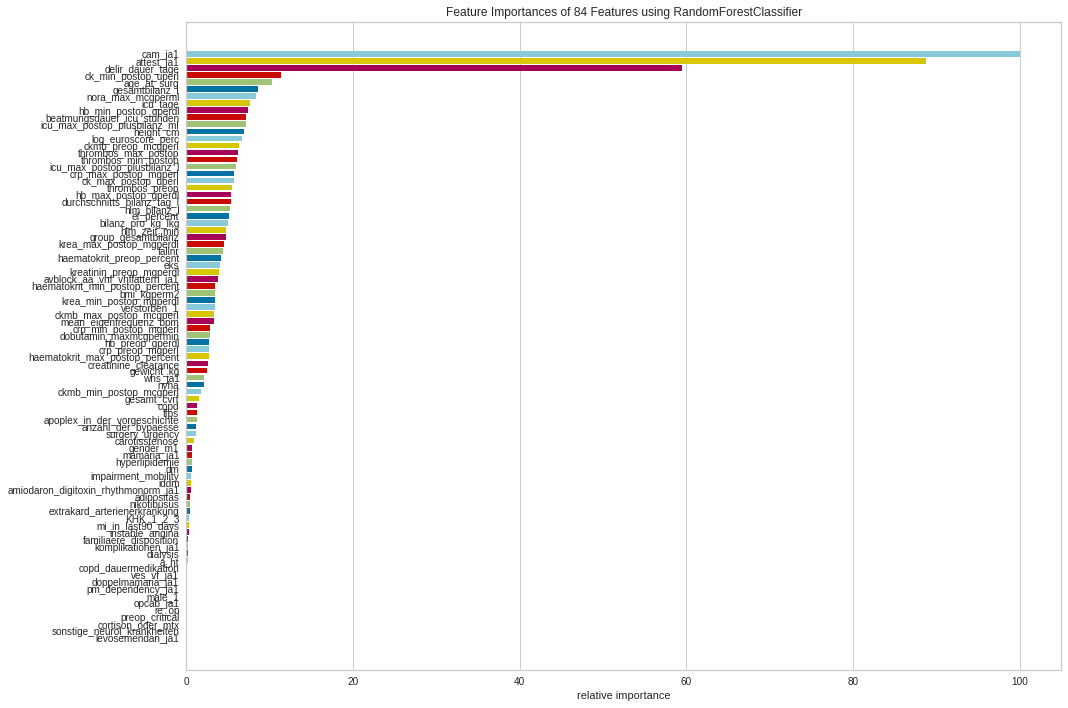

RandomForestClassifier()

In [ ]:
# Feature importances using random forest classifier

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

visualizer = RadViz(size=(1080, 720))
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()
model.fit(X, y)

# Training and Testing Using Different Classifiers

In [ ]:
# For splitting the y and features
from sklearn.model_selection import train_test_split
# For feature scaling
from sklearn.preprocessing import StandardScaler
# LDA (Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
# Testing the accuracy of the predictions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Classifiers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC
# Oversampling
from imblearn.over_sampling import SMOTE, ADASYN
# Model Selection
from sklearn.model_selection import GridSearchCV

In [ ]:
#Selecting Important Features

features = X[['delir_dauer_tage', 'attest_ja1', 'cam_ja1', 'age_at_surg']]

# Splitting the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=0, stratify=y)

# Applying feature scaling 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling
#X_train, y_train = SMOTE().fit_resample(X_train, y_train)


# Training and predicting
classifier = svm.SVC(C= 100, gamma= 0.1, kernel= 'rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Testing the accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[38  3]
 [ 1 10]]
Accuracy 0.9230769230769231


In [ ]:
# Using PCA (Principal Component Analysis)

# Splitting the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Oversampling
#X_train, y_train = SMOTE().fit_resample(X_train, y_train)


# Applying feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training and predicting
classifier = svm.SVC(C= 10, gamma= 1, kernel= 'rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Testing the accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))


KNeighborsClassifier()
{'leaf_size': 25, 'n_neighbors': 17, 'weights': 'uniform'}
DecisionTreeClassifier()
{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 42, 'splitter': 'random'}
LinearSVC()
{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 500, 'multi_class': 'ovr', 'random_state': 42}
SVC()
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
RandomForestClassifier()
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 60, 'random_state': 42}
SGDClassifier()
{'alpha': 5e-05, 'early_stopping': True, 'loss': 'hinge', 'max_iter': 900, 'penalty': 'l2', 'random_state': 42}
       Estimater  Accuracy
0     KNeighbors  0.923077
1   DecisionTree  0.942308
2            SVC  0.961538
3            SVM  0.942308
4            RFC  0.942308
5  SGDClassifier  0.961538
GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=1,
             param_grid={'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge

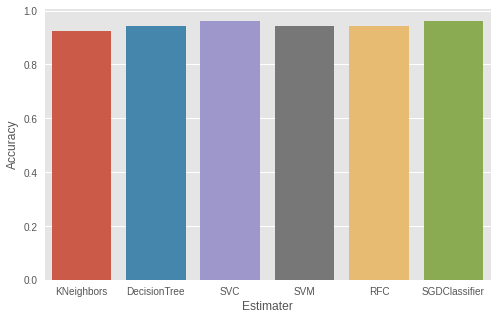

In [ ]:
# Testing other classifiers
#features = X[['delir_dauer_tage', 'attest_ja1', 'cam_ja1', 'age_at_surg']]

# Splitting the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Oversampling
X_train, y_train = ADASYN(random_state=0).fit_resample(X_train, y_train)

# Applying feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# ignore ConvergenceWarnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Training and predicting
models = [
    { "estimater": KNeighborsClassifier(),
      "params": {
          "n_neighbors": [17,18,19,20,30,35,45],
          "weights": ['uniform','distance'],
          "leaf_size": [25,30,35]
        }
    },
    { "estimater": DecisionTreeClassifier(),
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None,90,95,100,110],
          "max_features": [None, "auto","sqrt","log2"],
          "random_state": [42]
      }
    },
    { "estimater": LinearSVC(),
      "params": {
          "loss": ['hinge','squared_hinge'],
          "multi_class": ['ovr', 'crammer_singer'],
          "fit_intercept": [True, False],
          "random_state": [42],
          "max_iter": [500,600,700,1100,1200]
      }
    },
    { "estimater": svm.SVC(),
      "params": {
          'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
      }
    },
    { "estimater": RandomForestClassifier(),
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [40,50,60,90,95,100,110],
      "max_features": ['sqrt','log2'],
      "n_estimators": [60, 80, 90],
      "random_state": [42]
      }
    },
    { "estimater": SGDClassifier(),
      "params": {
          "loss": ['hinge','log','perceptron'], 
          "penalty": ['l2', 'l1'], 
          "alpha": [0.000001,0.00005,0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [900,1000, 1500],
          "random_state": [42]
      }
    }
]

column_names = ["KNeighbors", "DecisionTree", "SVC", "SVM", "RFC", "SGDClassifier"]
entries = []

highest_acc = 0
best_model = None

for model in models:
  print(model["estimater"])

  # Create a based model
  clf = model["estimater"]
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = clf, param_grid = model["params"], 
                            cv = 3, n_jobs = 1)
  # Fit the model
  grid_search.fit(X_train, y_train);

  # Make a prediction on the test split to find model accuracy
  predicted = grid_search.predict(X_test)
  acc = accuracy_score(predicted, y_test)
  entries.append(acc)

  print(grid_search.best_params_)

  # If model have the highest accuracy, it's out best model
  if acc > highest_acc:
    highest_acc = acc
    best_model = grid_search
    
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))

df = pd.DataFrame({"Estimater": column_names, 
                   "Accuracy": entries
                  })

sns.barplot(x='Estimater', y='Accuracy', data=df)

print(df)
print(best_model)

# Best Model

In [ ]:
#features = X[['delir_dauer_tage', 'attest_ja1', 'cam_ja1', 'age_at_surg']]

# Splitting the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Oversampling
X_train, y_train = ADASYN(random_state=0).fit_resample(X_train, y_train)

# Applying feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training and predicting
classifier = SGDClassifier(alpha= 0.0001, early_stopping= True, loss= 'hinge', max_iter= 1000, penalty= 'l1', random_state= 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Testing the accuracy
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[39  2]
 [ 0 11]]
Accuracy 0.9615384615384616


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        41
         1.0       0.85      1.00      0.92        11

    accuracy                           0.96        52
   macro avg       0.92      0.98      0.95        52
weighted avg       0.97      0.96      0.96        52

